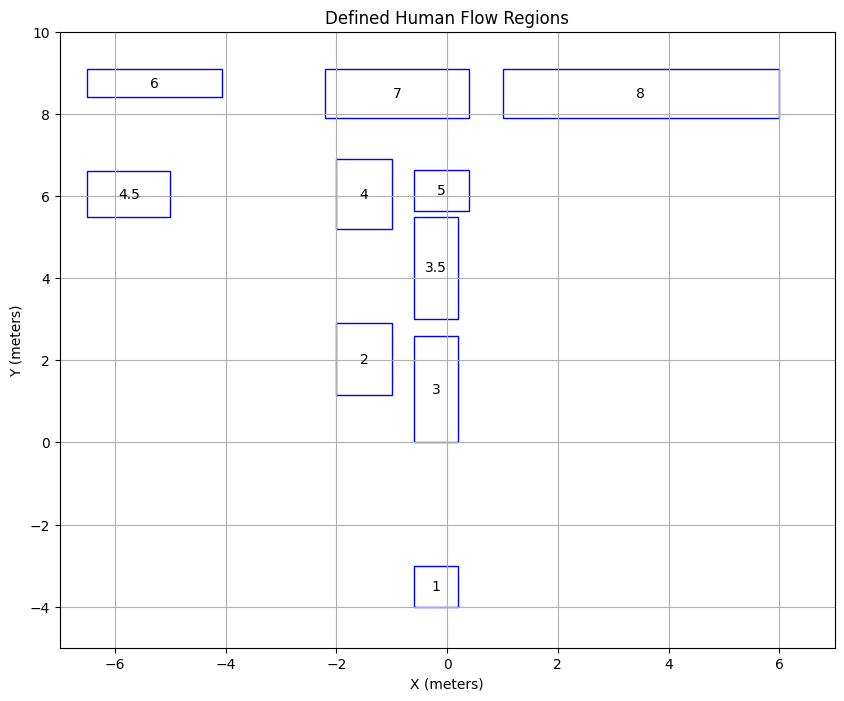

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 定义区域数据
regions = {
    1: np.array([-60, 20, -400, -300]) / 100.,
    2: np.array([-200, -100, 115, 290]) / 100.,
    3: np.array([-60, 20, 0, 260]) / 100.,
    3.5: np.array([-60, 20, 300, 550]) / 100.,
    4: np.array([-200, -100, 520, 690]) / 100.,
    4.5: np.array([-650, -500, 550, 660]) / 100.,
    5: np.array([-60, 40, 563, 664]) / 100.,
    6: np.array([-650, -406, 840, 910]) / 100.,
    7: np.array([-221, 40, 790, 910]) / 100.,
    8: np.array([100, 600, 790, 910]) / 100.
}

# 创建图形
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制每个区域
for label, (x_min, x_max, y_min, y_max) in regions.items():
    width = x_max - x_min
    height = y_max - y_min
    rect = plt.Rectangle((x_min, y_min), width, height, fill=False, edgecolor='blue')
    ax.add_patch(rect)
    ax.text(x_min + width/2, y_min + height/2, str(label), ha='center', va='center')

# 设置坐标轴范围
ax.set_xlim(-7, 7)
ax.set_ylim(-5, 10)
ax.set_xlabel('X (meters)')
ax.set_ylabel('Y (meters)')
ax.set_title('Defined Human Flow Regions')
ax.grid(True)

plt.show()


In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))


True
1
0
NVIDIA GeForce RTX 3060 Laptop GPU


/home/xch/miniforge3/envs/navirobo/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
